# Stock Market Analysis

Lets imagine for a moment that I'm a stock market analyst and I want to answer some question about some stock of my interest over the last year:

- What was the change in a stock's price over time?
- What was the daily return averange of a stock?
- What was the moving averange of various stocks?
- What was the correlation between daily return of diferent stocks?
- How much value fo we put at risk by investing in a particular stock?
- How can we attempt to predic future stock behaviour?

**This is just for learning porpourse, please don get me wrong I'm not a Stock Market Analyst.**

In [38]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
sns.set_style('whitegrid')
%matplotlib inline 

from pandas_datareader import data, wb
from pandas.testing import assert_frame_equal as fl
from datetime import datetime 

from __future__ import division
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Stocks I will like to explore
tickers_list = ['ANA.MC','NFLX','TEF.MC','AMZN','IBE.MC', 'REP.MC', 'CABK.MC', 'ETH-USD']
info_tickers = ['ACCIONA','NETFLIX','TELEFONICA','AMAZON','IBERDROLA','REPSOL','CaixaBank', 'Ethereum Criptocurrency']

### Definition of the stock tickers

In [3]:
ticker_def = pd.DataFrame({'SYMBOL at Yahoo Finace': tickers_list, 'Complete Name': info_tickers})

In [4]:
ticker_def.set_index('SYMBOL at Yahoo Finace', inplace=True)

In [11]:
# This will help to clarify the meaning of the simbol stocks
ticker_def

,Complete Name
SYMBOL at Yahoo Finace,
ANA.MC,ACCIONA
NFLX,NETFLIX
TEF.MC,TELEFONICA
AMZN,AMAZON
IBE.MC,IBERDROLA
REP.MC,REPSOL
CABK.MC,CaixaBank
ETH-USD,Ethereum Criptocurrency


### Defining the start and end datatime

In [6]:
# end Time of the study
end = datetime.now()
end

datetime.datetime(2020, 5, 2, 19, 1, 10, 793581)

In [7]:
# Start of the study
start = datetime(end.year - 1, end.month, end.day)
start

datetime.datetime(2019, 5, 2, 0, 0)

In [8]:
# This is to prove if the tickers work properly
data.DataReader("ETH-USD", 'yahoo', start, end) 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-01,162.937012,160.060699,160.853577,162.122787,6044171061,162.122787
2019-05-02,170.068741,161.080627,162.075165,167.952408,7299410672,167.952408
2019-05-03,170.645935,161.791428,167.887207,164.026581,6658100048,164.026581
2019-05-04,165.399979,159.700653,164.015259,163.450699,5938415561,163.450699
2019-05-05,175.760101,159.988190,163.337982,172.653214,7540096853,172.653214
...,...,...,...,...,...,...
2020-04-27,198.786545,194.849426,197.273514,198.415390,18217507467,198.415390
2020-04-28,218.454636,198.124512,198.465195,216.968231,26397548759,216.968231
2020-04-29,227.529694,206.436920,216.909134,207.602051,28089191903,207.602051


### Getting the data from Yahoo finance

In [13]:
# ACCIONA
ANA_MC = data.DataReader("ANA.MC", 'yahoo', start, end)
# NETFLIX
NFLX = data.DataReader("NFLX", 'yahoo', start, end)
# TELEFONICA
TEF_MC = data.DataReader("TEF.MC", 'yahoo', start, end)
# AMAZON
AMZN = data.DataReader("AMZN", 'yahoo', start, end)
# IBERDROLA
IBE_MC = data.DataReader("IBE.MC", 'yahoo', start, end)
# REPSOL
REP_MC = data.DataReader("REP.MC", 'yahoo', start, end)
# CaixaBank
CABK_MC = data.DataReader("CABK.MC", 'yahoo', start, end)
# Ethereum Criptocurrency
ETH_USD = data.DataReader("ETH-USD", 'yahoo', start, end)

### Simple exploration of AMAZON STOCK

In [15]:
# Price of the last days
AMZN.tail(45)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-28,1889.760010,1811.130005,1814.630005,1883.750000,9493800,1883.750000
2020-03-02,1954.510010,1870.000000,1906.489990,1953.949951,6761700,1953.949951
2020-03-03,1996.329956,1888.089966,1975.369995,1908.989990,7534500,1908.989990
2020-03-04,1978.000000,1922.000000,1946.569946,1975.829956,4772900,1975.829956
2020-03-05,1960.719971,1910.000000,1933.000000,1924.030029,4748200,1924.030029
2020-03-06,1910.869995,1869.500000,1875.000000,1901.089966,5273600,1901.089966
2020-03-09,1862.770020,1761.290039,1773.859985,1800.609985,7813200,1800.609985
2020-03-10,1894.270020,1818.170044,1870.880005,1891.819946,7133300,1891.819946
2020-03-11,1871.319946,1801.500000,1857.849976,1820.859985,5624800,1820.859985


In [12]:
# Basic stats
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,1899.364467,1861.542926,1880.832135,1881.418220,4.097547e+06,1881.418220
std,149.208714,140.617158,144.536453,144.308133,2.039203e+06,144.308133
min,1725.000000,1626.030029,1641.510010,1676.609985,8.813000e+05,1676.609985
25%,1793.770020,1762.680054,1778.010010,1784.030029,2.763400e+06,1784.030029
50%,1871.319946,1827.349976,1842.010010,1855.319946,3.493200e+06,1855.319946
75%,1949.099976,1906.630005,1930.099976,1922.189941,4.927100e+06,1922.189941
max,2461.000000,2386.050049,2443.199951,2410.219971,1.556730e+07,2410.219971


In [13]:
# Information of the DataFrame(Total columns and Total rows)
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-04-29 to 2020-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    int64  
 5   Adj Close  253 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


### Change of the stock during the year

##### Plotting the stock's adjusted closing price using pandas

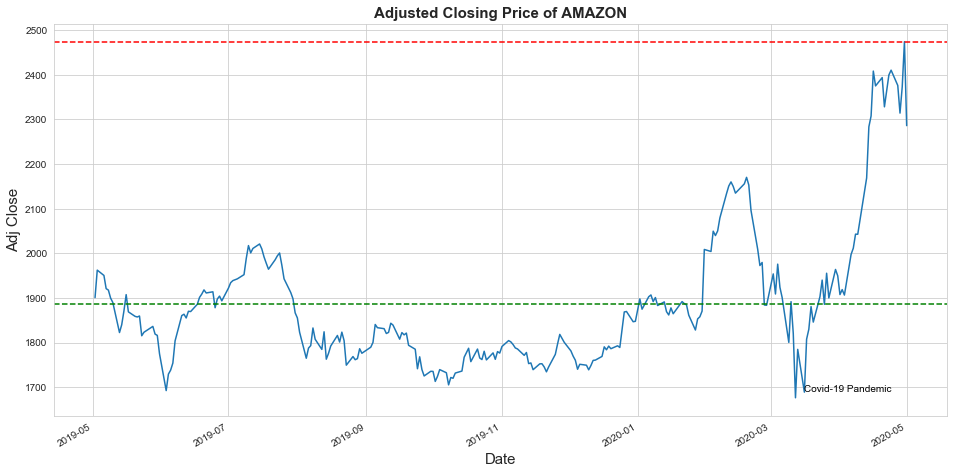

In [36]:
# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the data
AMZN['Adj Close'].plot(ax=ax)

# Customize the plot
style = dict(size=10, color='black')
ax.text('2020-3-16', 1689.15, "Covid-19 Pandemic", **style)

ax.set_title('Adjusted Closing Price of AMAZON', fontsize=15, fontweight='bold')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Adj Close', fontsize=15)


# Add a meanline
ax.axhline(AMZN['Adj Close'].mean(),
           color='g',
           linestyle="--");
# Add a maxline
ax.axhline(AMZN['Adj Close'].max(),
           color='r',
           linestyle="--");

As we can see in the Plot above, Amazon is doing pretty well during the covid-19 crisis, during the pandemic people rely more in online shopping.

##### Plotting the total volume being traded over time

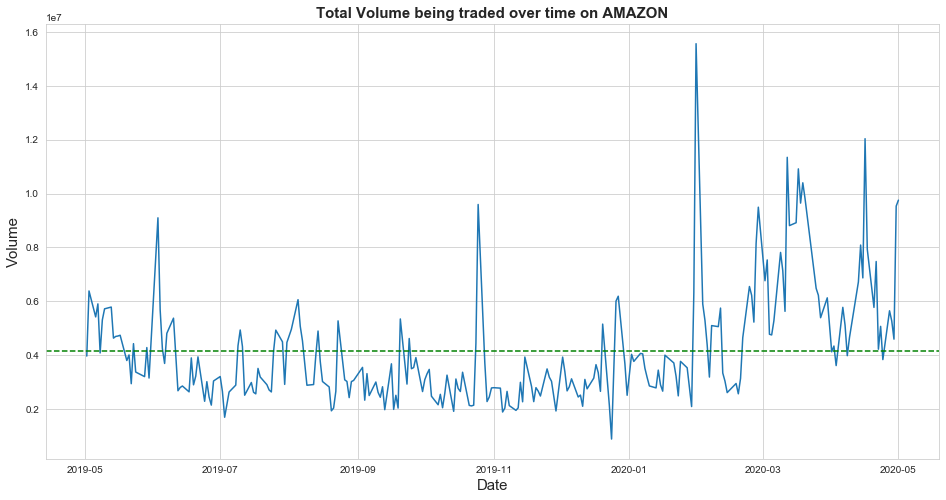

In [42]:
# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the data
volume_amzn = ax.plot(AMZN['Volume'])

# Customize the plot
ax.set_title('Total Volume being traded over time on AMAZON', fontsize=15, fontweight='bold')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Volume', fontsize=15)

# Add a meanline
ax.axhline(AMZN['Volume'].mean(),
          color='g',
          linestyle='--');


I have no clue about what couse this peaks we se in the Plot. We can see a bullist trend after February of 2020. 

Pay atention to the y-axis, 0.2*1e7 - 1.6*1e7. 

### What was the moving average of various stocks?

Simple Moving Average (SMA) - calculates the arithmetic mean of a security over a number (n) of time periods, A.

**Formula**


![](img/sma.JPG)

where:
A = average in period n

n = number of time periods

In [43]:
period = [10, 20, 30, 50]

for n in period:
    column_name = f"SMA for {n} days"
    
    AMZN[column_name] = AMZN['Adj Close'].rolling(window=n, center=False).mean()

In [44]:
AMZN.tail()

,High,Low,Open,Close,Volume,Adj Close,SMA for 10 days,SMA for 20 days,SMA for 30 days,SMA for 50 days
Date,,,,,,,,,,
2020-04-27,2444.879883,2363.000000,2443.199951,2376.000000,5645600,2376.000000,2364.508008,2177.784497,2073.135327,2025.446995
2020-04-28,2373.500000,2306.000000,2372.100098,2314.080078,5269400,2314.080078,2367.584009,2195.291003,2093.966329,2029.031194
2020-04-29,2391.889893,2310.000000,2330.010010,2372.709961,4591600,2372.709961,2374.087012,2216.440503,2112.795329,2033.371995
2020-04-30,2475.000000,2396.010010,2419.840088,2474.000000,9534600,2474.000000,2380.668018,2244.755505,2134.261995,2039.447595
2020-05-01,2362.439941,2258.189941,2336.800049,2286.040039,9754900,2286.040039,2371.772021,2263.116010,2147.765662,2042.106394


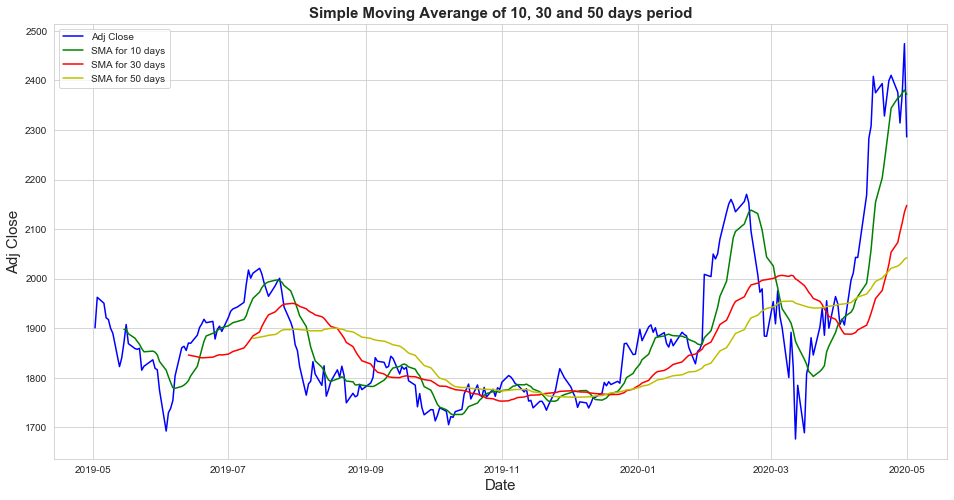

In [45]:
# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Plot the data
ax.plot(AMZN['Adj Close'], 'b', label='Adj Close')
ax.plot(AMZN['SMA for 10 days'], 'g', label='SMA for 10 days')
ax.plot(AMZN['SMA for 30 days'], 'r', label='SMA for 30 days')
ax.plot(AMZN['SMA for 50 days'], 'y', label='SMA for 50 days')

# Customize the plot
ax.set_title('Simple Moving Averange of 10, 30 and 50 days period', fontsize=15, fontweight='bold')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Adj Close', fontsize=15)

ax.legend();

Stocks have to many fluctuations as we can see in the plot above, but if 
we take a look at the SMA we can see that we have less fluctuations and is much easier to see the bullish trend of AMZON stocks during the last month.

### What was the daily return average of a stock?

The average return is the simple mathematical average of a series of returns generated over a period of time.

**Formula**


![](img/ar.JPG)


Where:

vf = final value

vi = initial value

In [47]:
AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()

In [48]:
AMZN['Daily Return'].tail(10)

Date
2020-04-20    0.007836
2020-04-21   -0.027360
2020-04-22    0.015192
2020-04-23    0.015215
2020-04-24    0.004489
2020-04-27   -0.014198
2020-04-28   -0.026061
2020-04-29    0.025336
2020-04-30    0.042690
2020-05-01   -0.075974
Name: Daily Return, dtype: float64

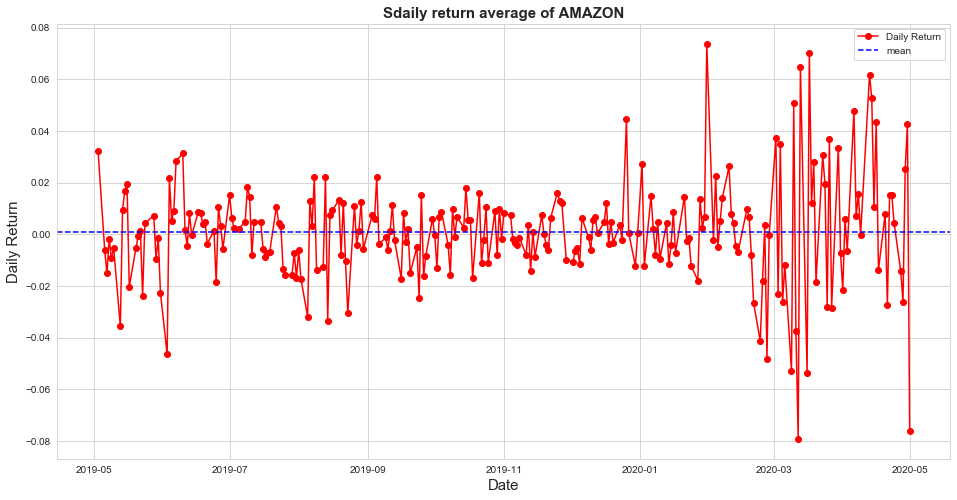

In [52]:
# Ploting the daily return

# Plot creation
fig, ax = plt.subplots(figsize=(16,8))

# Ploting the data
ax.plot(AMZN['Daily Return'], 'r', label='Daily Return',marker='o' )

# Customizing
ax.set_title('Sdaily return average of AMAZON', fontsize=15, fontweight='bold')
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Daily Return', fontsize=15)


# Adding a mean
ax.axhline(AMZN['Daily Return'].mean(),
          color='b',
          linestyle='--',
          label='mean');

ax.legend()

In the plot above a think we can see the blood in the market, to many fluctiations. The mean line can tell us that if we play in the long run we'll not suffer the market fluctuations.

Text(0, 0.5, 'Frequency')

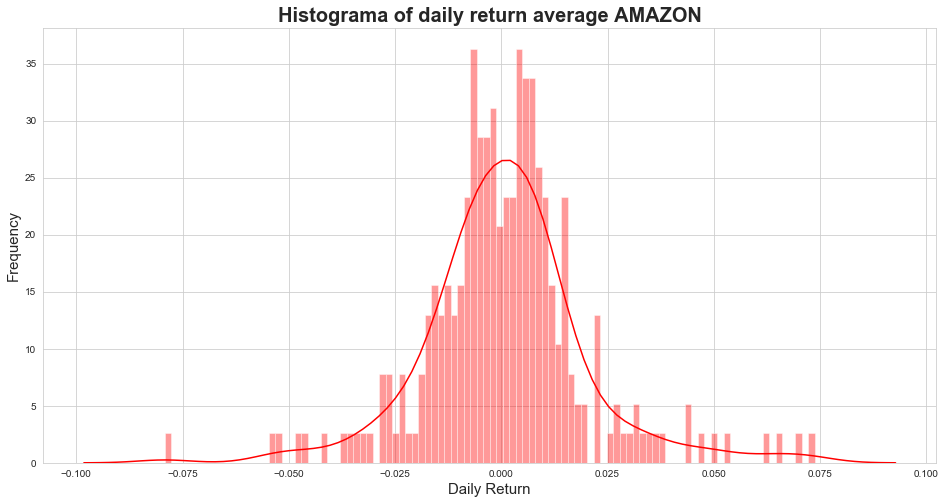

In [140]:
# Ploting the daily return
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(AMZN['Daily Return'].dropna(), bins=100, color='red')

# Customizing
ax.set_title('Histograma of daily return average AMAZON', fontsize=20, fontweight='bold')
ax.set_xlabel('Daily Return', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)

Looks like positive returns are slightly more often for AMAZON stocks.

### What was the correlation between daily returns of different stocks?

In [53]:
tickers_list = ['ANA.MC','NFLX','TEF.MC','AMZN','IBE.MC', 'REP.MC', 'CABK.MC']
close_df = data.DataReader(tickers_list,'yahoo',start,end)['Adj Close']

In [54]:
ticker_def

,Complete Name
SYMBOL at Yahoo Finace,
ANA.MC,ACCIONA
NFLX,NETFLIX
TEF.MC,TELEFONICA
AMZN,AMAZON
IBE.MC,IBERDROLA
REP.MC,REPSOL
CABK.MC,CaixaBank
ETH-USD,Ethereum Criptocurrency


In [55]:
close_df_ETH_USD = ETH_USD['Adj Close'].tail()

In [56]:
close_df_ETH_USD

Date
2020-04-27    198.415390
2020-04-28    216.968231
2020-04-29    207.602051
2020-04-30    214.219101
2020-05-02    214.884811
Name: Adj Close, dtype: float64

In [57]:
close_df.tail()

Symbols,ANA.MC,NFLX,TEF.MC,AMZN,IBE.MC,REP.MC,CABK.MC
Date,,,,,,,
2020-04-27,89.900002,421.380005,4.026,2376.000000,8.908,7.812,1.5340
2020-04-28,91.000000,403.829987,4.055,2314.080078,9.076,7.912,1.5780
2020-04-29,91.000000,411.890015,4.180,2372.709961,9.348,8.502,1.7115
2020-04-30,90.400002,419.850006,4.180,2474.000000,9.140,8.314,1.6410
2020-05-01,NaN,415.269989,NaN,2286.040039,NaN,NaN,NaN


Let's compare the daily return of all this stocks and see how they behave

In [58]:
close_df.pct_change()

Symbols,ANA.MC,NFLX,TEF.MC,AMZN,IBE.MC,REP.MC,CABK.MC
Date,,,,,,,
2019-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-03,0.007968,0.015749,-0.003825,0.032428,0.003775,-0.004384,0.004187
2019-05-06,-0.019269,-0.016518,-0.000686,-0.006069,0.003761,-0.008469,-0.012509
2019-05-07,0.006045,-0.021681,-0.009193,-0.015150,0.001999,-0.018107,-0.017593
2019-05-08,-0.000501,-0.016439,-0.005678,-0.001681,-0.013463,0.003479,0.012536
...,...,...,...,...,...,...,...
2020-04-27,0.043529,-0.008494,0.013340,-0.014198,0.020857,0.009042,-0.002925
2020-04-28,0.012236,-0.041649,0.007203,-0.026061,0.018859,0.012801,0.028683
2020-04-29,0.000000,0.019959,0.030826,0.025336,0.029969,0.074570,0.084601


In [59]:
close_df_ETH_USD.pct_change()

Date
2020-04-27         NaN
2020-04-28    0.093505
2020-04-29   -0.043168
2020-04-30    0.031874
2020-05-02    0.003108
Name: Adj Close, dtype: float64

**Let's compare Netflix with Amazon just for FUN  ans see what insight wee have**

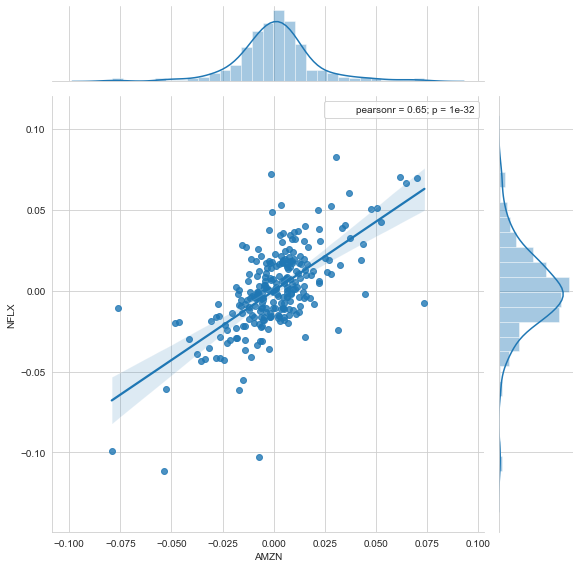

In [60]:
g = sns.JointGrid(x='AMZN', y='NFLX', size=8, data=close_df.pct_change())
g = g.plot(sns.regplot, sns.distplot)
g.annotate(stats.pearsonr)

Loking the Plot above... It looks like we have some correlations. We have a Pearson R Correlations Coeficient value of 0.65. Mmmm waht could be the reason maybe amazon prime compiting with Nexflig as more people are bored at home... I don't realy sure.


![](img/pearsonr.JPG)

**Let's see the correlation beteween all the stocks I peak in a glince and explore what interesant thing we can find.**

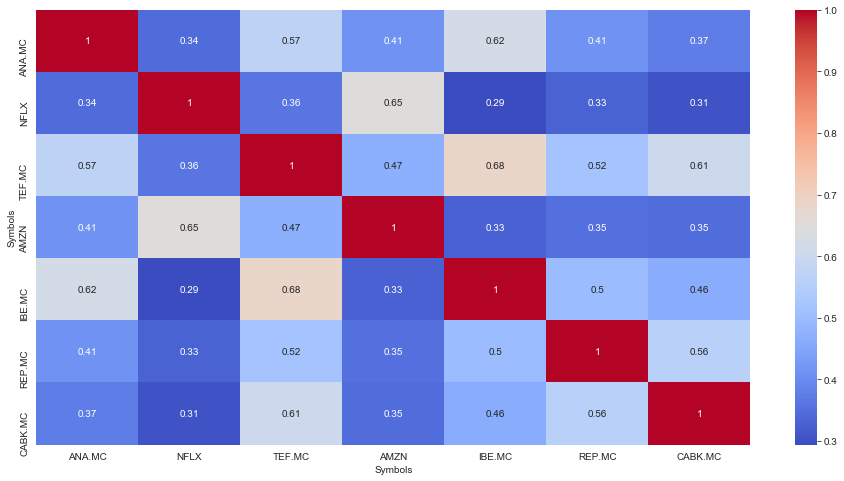

In [62]:
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(close_df.pct_change().corr(), cmap='coolwarm', annot=True)

**surprise surprice!!**

Relevant correlations:

- Acciona and Iberdrola --> Person Coeficient of 0.62
- Acciona and Telefónica --> Person Coeficient of 0.57
- Amazon and Netflix --> Person Coeficient of 0.65
- Repsol and Caixabank --> Person Coeficient of 0.56
- Repsol and Iberdrola --> Person Coeficient of 0.50
- Repsol and Telefónica --> Person Coeficient of 0.52
- Caixabank and Telefónica --> Person Coeficient of 0.61

**No clue about this could mean... Anything a could say it will just nonesense, but is fun to try to understand how things work.**

### How much value do we put at risk by investing in a particular stock?

In [63]:
new_set = close_df.pct_change().dropna()

In [64]:
new_set

Symbols,ANA.MC,NFLX,TEF.MC,AMZN,IBE.MC,REP.MC,CABK.MC
Date,,,,,,,
2019-05-03,0.007968,0.015749,-0.003825,0.032428,0.003775,-0.004384,0.004187
2019-05-06,-0.019269,-0.016518,-0.000686,-0.006069,0.003761,-0.008469,-0.012509
2019-05-07,0.006045,-0.021681,-0.009193,-0.015150,0.001999,-0.018107,-0.017593
2019-05-08,-0.000501,-0.016439,-0.005678,-0.001681,-0.013463,0.003479,0.012536
2019-05-09,0.012024,-0.004446,-0.008496,-0.009334,-0.004296,-0.010402,-0.022993
...,...,...,...,...,...,...,...
2020-04-27,0.043529,-0.008494,0.013340,-0.014198,0.020857,0.009042,-0.002925
2020-04-28,0.012236,-0.041649,0.007203,-0.026061,0.018859,0.012801,0.028683
2020-04-29,0.000000,0.019959,0.030826,0.025336,0.029969,0.074570,0.084601


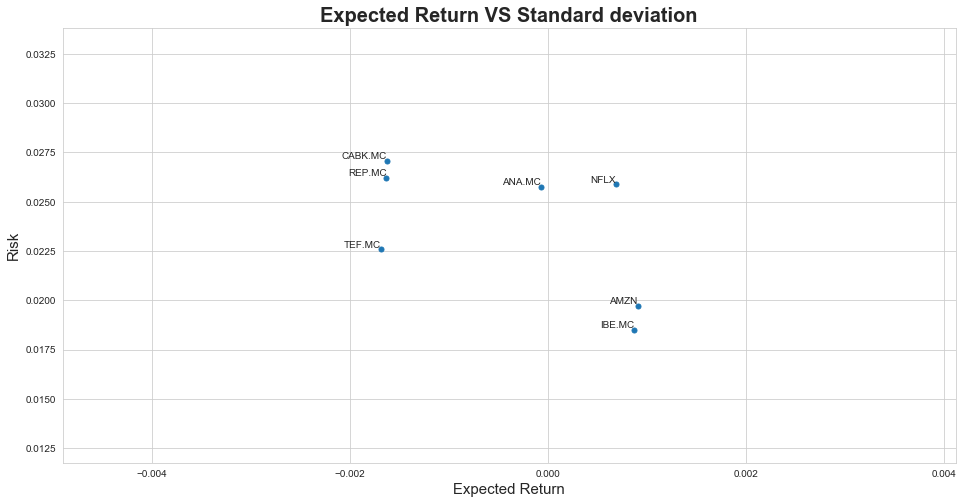

In [65]:

fig, ax = plt.subplots(figsize=(16,8))

plt.scatter(new_set.mean(), new_set.std(), s=25)

ax.set_title('Expected Return VS Standard deviation', fontsize=20, fontweight='bold')
ax.set_xlabel('Expected Return', fontsize=15)
ax.set_ylabel('Risk', fontsize=15)

#For adding annotatios in the scatterplot
for label,x,y in zip(new_set.columns, new_set.mean(), new_set.std()):
    plt.annotate(
    label,
    xy=(x,y),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

In life we all want the same, low rist and higher return... Soo its look like amazon and iberdrola could be a good bet. And if you love the risk yo can bet also for Netflix. 

I'm done with this notebook, keep checking out my project. 

I hope you're learning as much I'm during this days. 

Happy Coding ;)